# 1. Load data

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# 2. Data cleaning

In [35]:
# xóa cột customerID
df.drop(['customerID'], axis=1, inplace=True)

In [36]:
# kiểm tra duplicate
df.duplicated().sum()

np.int64(22)

In [37]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [38]:
# chuyển cột TotalCharges sang dạng số
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [39]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [40]:
# thay thế các giá trị null trong cột TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

/tmp/ipython-input-4014764322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [41]:
# kiểm tra các giá trị trong từng cột object
def check_unique_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'{col}: {df[col].unique()}')

In [42]:
check_unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [43]:
# thay thế 'No internet service' và 'No phone service' thành 'No'
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)
check_unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [44]:
# chuyển các cột chỉ có giá trị 'Yes', 'No' thành 1,0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-3535867294.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [45]:
# chuyển cột gender thành 1,0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

/tmp/ipython-input-2452251301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


In [46]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


# 3. Chia dữ liệu

In [47]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Tiền xử lý dữ liệu

In [49]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('cat', OneHotEncoder(),['InternetService','Contract','PaymentMethod'])
])

# 4. Xây dựng và huấn luyện mô hình

In [59]:
log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



- Accuracy: Mô hình có độ chính xác tổng thể là 81%, có nghĩa là mô hình dự đoán đúng khoảng 81% tổng số trường hợp trong tập dữ liệu kiểm tra.
- Precision - 0: Độ chính xác là 0.85, cho thấy khi mô hình dự đoán một khách hàng sẽ "Không Churn", thì 85% trong số đó thực sự "Không Churn".
- Recall - 0: Độ nhạy là 0.90, có nghĩa là mô hình xác định đúng 90% số khách hàng thực sự "Không Churn".
- F1-score - 0: Điểm F1 là 0.88, cho thấy sự cân bằng tốt giữa precision và recall cho lớp "Không Churn".
- Precision - 1: Độ chính xác là 0.68, cho thấy khi mô hình dự đoán một khách hàng sẽ "Churn", thì 68% trong số đó thực sự "Churn".
- Recall - 1: Độ nhạy là 0.56, có nghĩa là mô hình chỉ xác định đúng 56% số khách hàng thực sự "Churn". Điều này cho thấy mô hình còn gặp khó khăn trong việc phát hiện tất cả các trường hợp "Churn" thực tế.
- F1-score - 1: Điểm F1 là 0.61, thấp hơn so với lớp "Không Churn", phản ánh hiệu suất thấp hơn của mô hình trong việc dự đoán khách hàng "Churn".

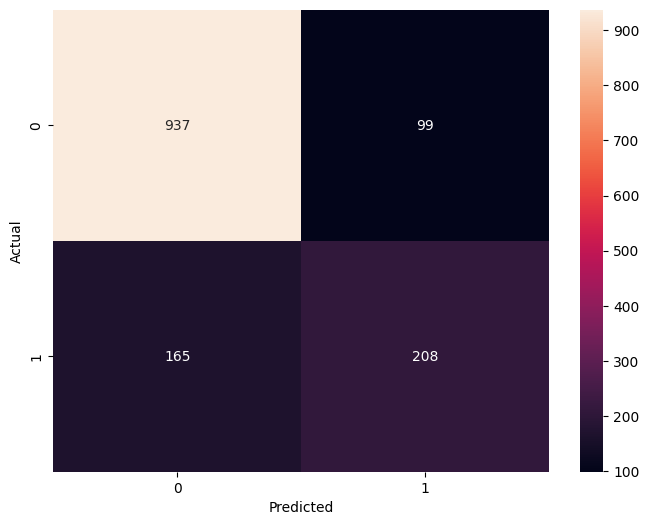

In [61]:
# trực quan hóa confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Mô hình dự đoán đúng 932 khách hàng "Không Churn" và 207 khách hàng "Churn".
- Mô hình dự đoán sai 104 khách hàng "Không Churn" thành "Churn" (False Positive).
- Mô hình dự đoán sai 166 khách hàng "Churn" thành "Không Churn" (False Negative).
- Nhận xét chung:
Mô hình hoạt động tốt hơn trong việc dự đoán khách hàng "Không Churn" so với khách hàng "Churn". Recall thấp cho lớp "Churn" là một điểm cần cải thiện, vì việc bỏ sót các trường hợp khách hàng có khả năng "Churn" có thể ảnh hưởng đến các chiến lược giữ chân khách hàng.